# Exploratory Data Analysis
This data analysis aims to provide a comprehensive assessment of stroke, utilizing a health dataset containing various demographic and health information. It seeks to understand the relationships between patients' likelihood of having a stroke and other features, identifies factors influencing stroke risk, and proposes preventative measures based on this information. 

The dataset includes unique identifiers for each patient along with various demographic and health features. Among the features are gender, age, history of hypertension and hear disease, marital status, occupation, residence type, average glucose level in the blood, body mass index (BMI), smoking status, and whether the patient has had a stroke. 

### Data Explanation
The data contains 12 features:
- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood (Normally should be 70-140 mg/dl)
- bmi: body mass index (Normally should be 18-25)
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not
- This dataset provides crucial information for determining patients' risk of stroke and understanding factors related to stroke. During data analysis, it will be particularly important to evaluate the relationships between experiencing a stroke and other features, identifying factors that could influence stroke risk.

### Imports

In [50]:
import numpy as np
import pandas as pd

import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import itertools
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LogisticRegression
import joblib
import os

### Reading Data & Handling Missing Values

In [51]:
df = pd.read_csv("dataset.csv")  
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [52]:
df.shape

(5110, 12)

In [53]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [54]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [55]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Converting Object Types to Category

In [57]:
#convert all columns has type  object to category
convert_columns = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']

for column in convert_columns:
    df[column] = df[column].astype('category')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   category
 4   heart_disease      5110 non-null   category
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   category
dtypes: category(8), float64(3), int64(1)
memory usage: 200.9 KB


In [59]:
df[df.duplicated(subset=['id'],keep=False)] # check for duplicate ids

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [60]:
df['stroke'].value_counts() # count the number of data points per class

0    4861
1     249
Name: stroke, dtype: int64

### Plotting Each Attribute to Visualize Occurence of Stroke

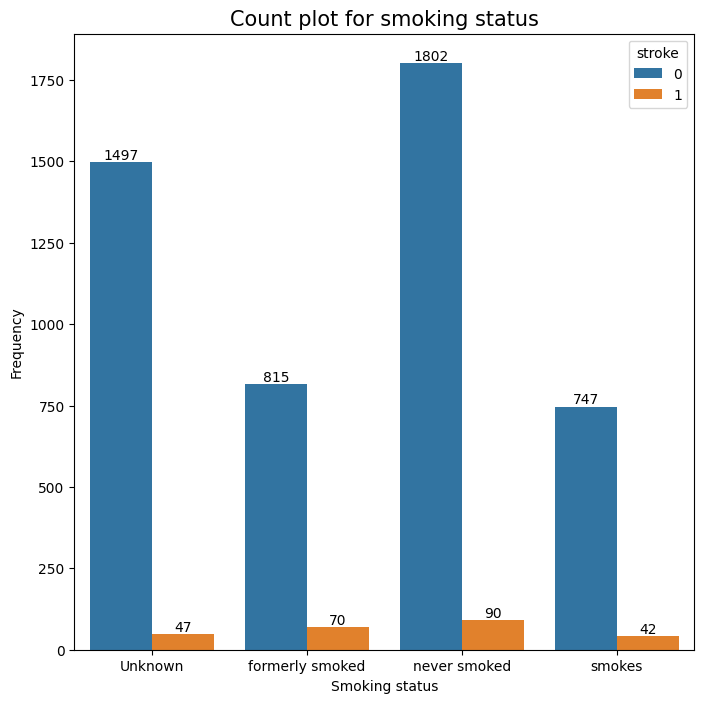

In [61]:
# Create the count or bar plot
plt.figure(figsize=(8, 8)) 
ax = sns.countplot(x='smoking_status', hue='stroke',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Smoking status')
plt.ylabel('Frequency')
plt.title('Count plot for smoking status', fontsize=15)
# Show the plot
plt.show()

There seems to be a greater percentage of people who experienced a stroke out of those who formerly smoked and currently smoke than the group of people who's smoking status is unknown and who never smoked. 

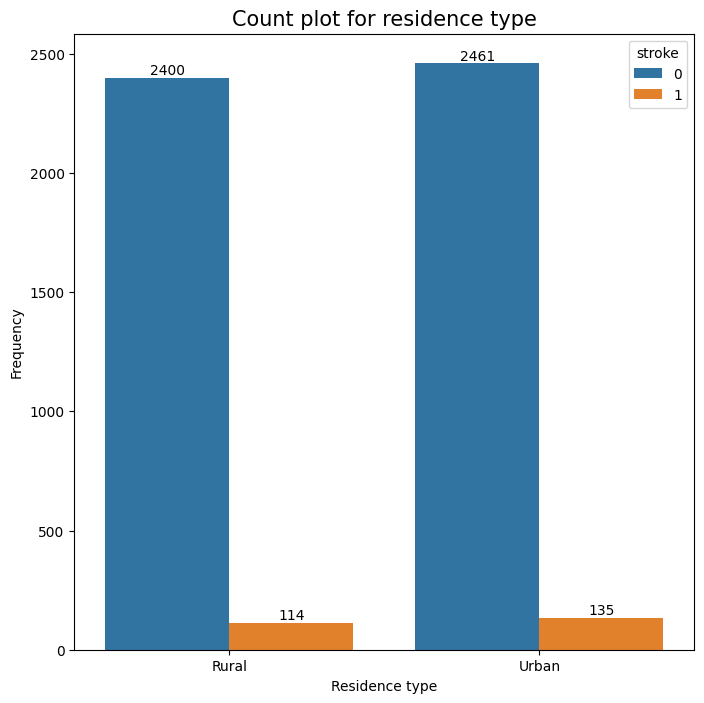

In [62]:
# Create the count or bar plot
plt.figure(figsize=(8, 8)) 
ax = sns.countplot(x='Residence_type', hue='stroke',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Residence type')
plt.ylabel('Frequency')
plt.title('Count plot for residence type', fontsize=15)
# Show the plot
plt.show()

Residence type does not seem to influence stroke occurrence according to this graph

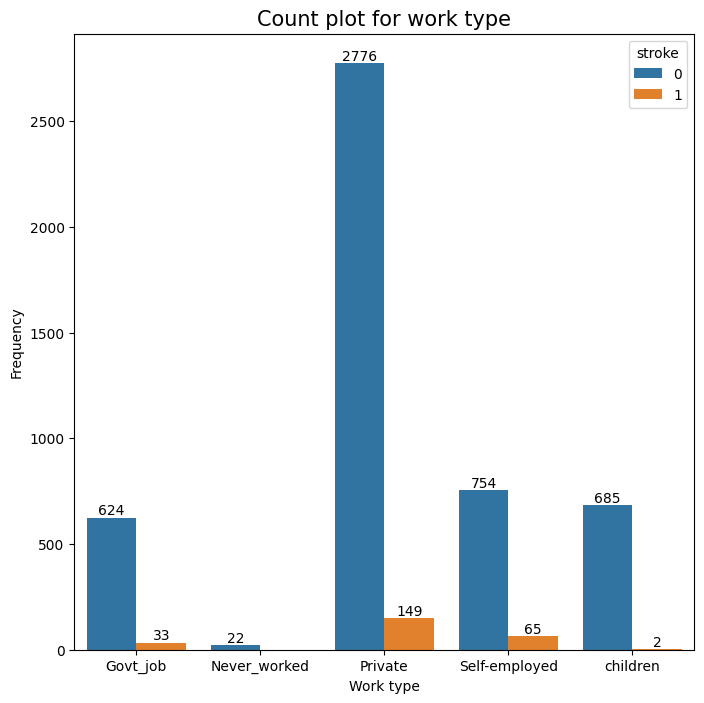

In [63]:
# Create the count or bar plot
plt.figure(figsize=(8, 8))  
ax = sns.countplot(x='work_type', hue='stroke',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Work type')
plt.ylabel('Frequency')
plt.title('Count plot for work type', fontsize=15)
# Show the plot
plt.show()

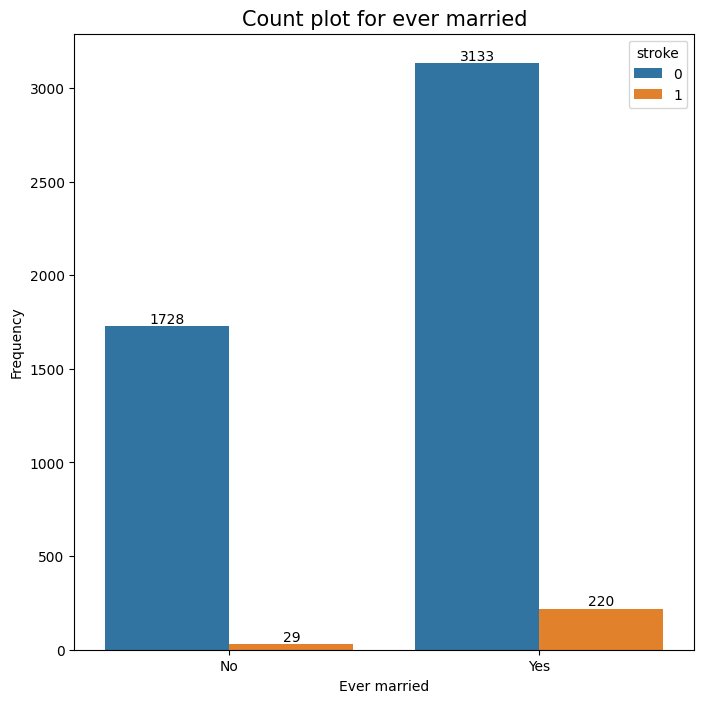

In [64]:
# Create the count or bar plot
plt.figure(figsize=(8,8)) 
ax = sns.countplot(x='ever_married', hue='stroke',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Ever married')
plt.ylabel('Frequency')
plt.title('Count plot for ever married', fontsize=15)
# Show the plot
plt.show()

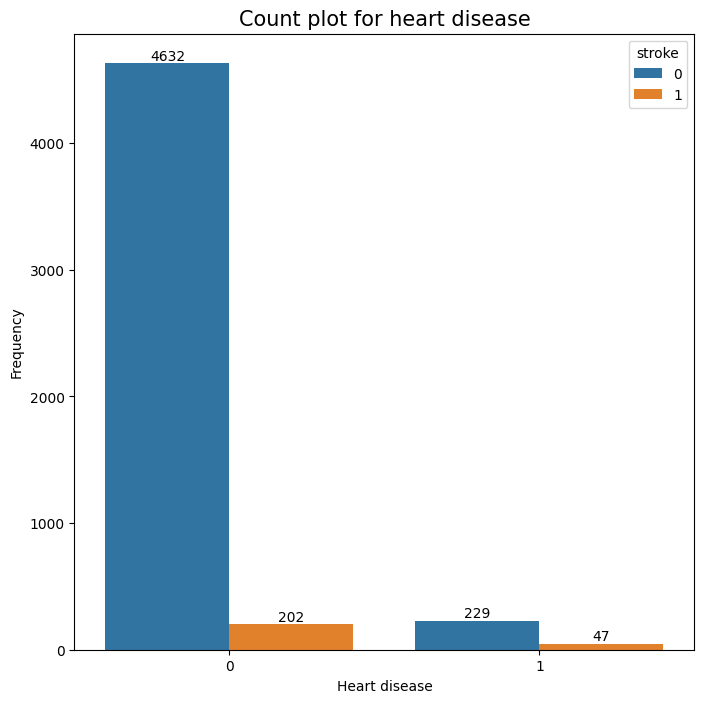

In [65]:
# Create the count or bar plot
plt.figure(figsize=(8, 8)) 
ax = sns.countplot(x='heart_disease', hue='stroke',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Heart disease')
plt.ylabel('Frequency')
plt.title('Count plot for heart disease', fontsize=15)
# Show the plot
plt.show()

A greater percentage of those with heart disease experience a stroke than those without heart disease according to this bar chart.

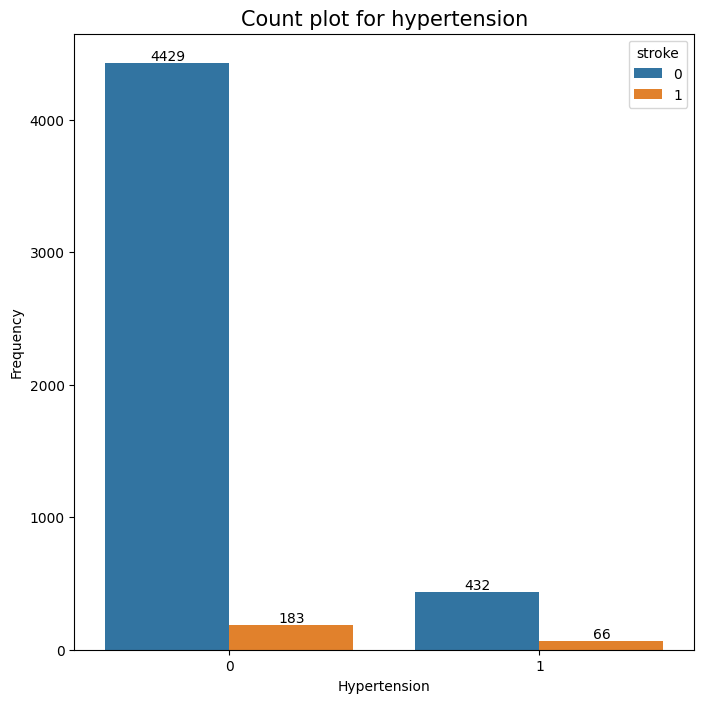

In [66]:
# Create the count or bar plot
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='hypertension', hue='stroke',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Hypertension')
plt.ylabel('Frequency')
plt.title('Count plot for hypertension', fontsize=15)
# Show the plot
plt.show()

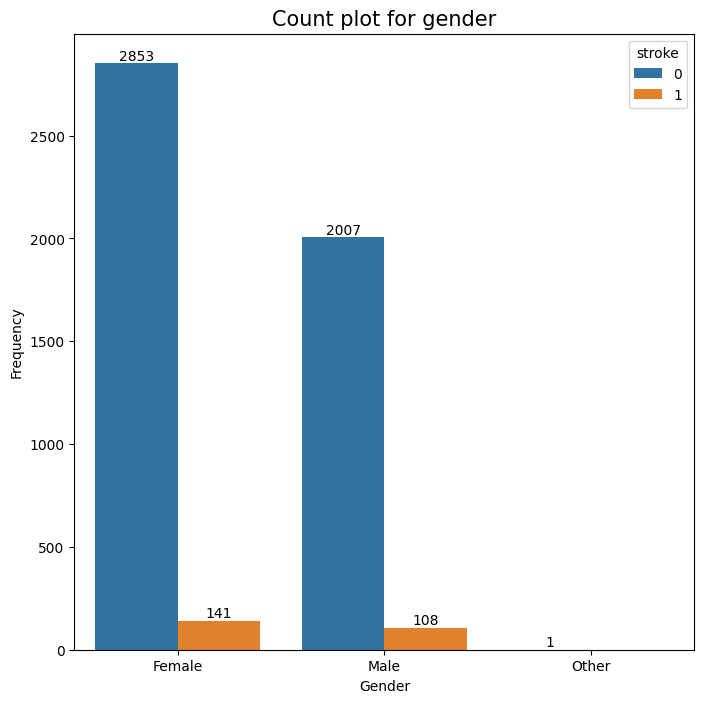

In [67]:
# Create the count or bar plot
plt.figure(figsize=(8, 8)) 
ax = sns.countplot(x='gender', hue='stroke',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Count plot for gender', fontsize=15)
# Show the plot
plt.show()

### Pairplot of Numerical Attributes

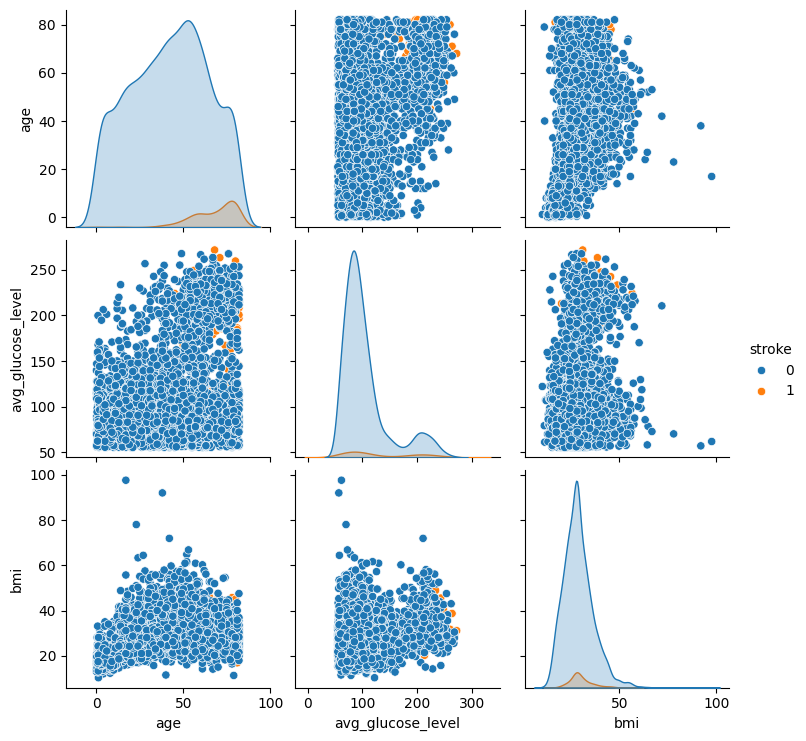

In [68]:
sns.pairplot(df,vars = ['age','avg_glucose_level','bmi'],hue='stroke')
plt.show()

### Heatmap of Numerical Attributes

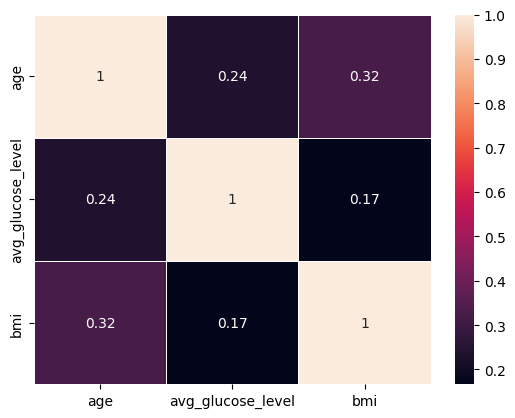

In [69]:
sns.heatmap(df[['age', 'avg_glucose_level', 'bmi']].corr(), linewidths=0.5, annot=True)
plt.show()

# Data Preprocessing

In [70]:
df.drop(['id'],axis=1,inplace=True)

In [71]:
df.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.862035
std,22.612647,45.283560,7.699562
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


In [72]:
df[['age','avg_glucose_level','bmi']].corr()

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.324296
avg_glucose_level,0.238171,1.000000,0.166876
bmi,0.324296,0.166876,1.000000


In [73]:
df['stroke'].value_counts().to_frame()

,stroke
0,4861
1,249


### Balancing Dataset by Oversampling Minority Class

In [74]:
stroke_majority=df[df['stroke']==0]
stroke_minority=df[df['stroke']==1]

In [75]:
stroke_minority_oversample=resample(stroke_minority,n_samples=4861,replace=True,random_state=42)

In [76]:
stroke_df=pd.concat([stroke_minority_oversample,stroke_majority])

In [77]:
stroke_df['stroke'].value_counts().to_frame()

,stroke
0,4861
1,4861


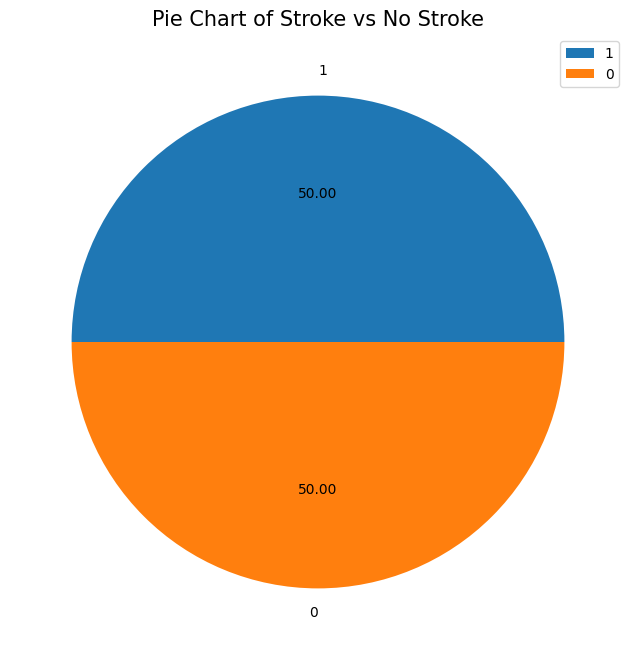

In [78]:
has_stroke = stroke_df.loc[df['stroke']==1,'stroke'].count()
no_stroke = stroke_df.loc[df['stroke']==0,'stroke'].count()
label=['1','0']
fig = plt.figure(figsize = (12,8))
patches = plt.pie([has_stroke,no_stroke], labels=label,autopct='%.2f')
plt.legend(label)
plt.title('Pie Chart of Stroke vs No Stroke', fontsize=15)
plt.show()

# Training the Data

In [79]:
if not os.path.exists("./scalers"):
    os.mkdir("./scalers")

# apply normalization techniques 
columns_to_convert = ['age','avg_glucose_level','bmi']
scaler = MinMaxScaler()
for column in columns_to_convert:
    stroke_df[column] = scaler.fit_transform(np.array(stroke_df[column]).reshape(-1,1))
    joblib.dump(scaler, f'./scalers/{column}_minmax_scaler.pkl')
# view normalized data   
display(stroke_df) 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
102,Female,0.902344,0,0,Yes,Private,Rural,0.814745,0.278351,formerly smoked,1
179,Male,0.987793,0,0,Yes,Private,Urban,0.729850,0.180985,Unknown,1
92,Female,0.694824,0,0,No,Self-employed,Urban,0.059551,0.311569,never smoked,1
14,Female,0.963379,0,1,Yes,Private,Urban,0.733866,0.205040,never smoked,1
106,Female,0.609375,1,0,Yes,Private,Rural,0.083372,0.229095,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,0.975586,1,0,Yes,Private,Urban,0.132167,0.203895,never smoked,0
5106,Female,0.987793,0,0,Yes,Self-employed,Urban,0.323516,0.340206,never smoked,0
5107,Female,0.426270,0,0,Yes,Self-employed,Rural,0.128658,0.232532,never smoked,0
5108,Male,0.621582,0,0,Yes,Private,Rural,0.513203,0.175258,formerly smoked,0


In [80]:
if not os.path.exists("./encoders"):
    os.mkdir("./encoders")

categories=["gender","ever_married","work_type","Residence_type","smoking_status"]
LE=LabelEncoder()
for i in categories:
    stroke_df[i]=LE.fit_transform(stroke_df[i])
    print(f"{i}: {LE.classes_}")
    joblib.dump(LE, f'./encoders/{i}_label_encoder.pkl')

gender: ['Female' 'Male' 'Other']
ever_married: ['No' 'Yes']
work_type: ['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children']
Residence_type: ['Rural' 'Urban']
smoking_status: ['Unknown' 'formerly smoked' 'never smoked' 'smokes']


In [81]:
df.shape,stroke_df.shape

((5110, 11), (9722, 11))

In [82]:
X=stroke_df.drop(['stroke'],axis=1)
y=stroke_df['stroke']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=10)

In [84]:
X_train.shape,X_test.shape

((8749, 10), (973, 10))

### Logistic Regression Model

In [85]:
LR = LogisticRegression(C=0.011, solver='liblinear').fit(X_train,y_train)
y_pred = LR.predict(X_test)

In [86]:
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,

In [87]:
y_prob = LR.predict_proba(X_test)
y_prob

array([[0.37219015, 0.62780985],
       [0.56530419, 0.43469581],
       [0.22178121, 0.77821879],
       ...,
       [0.40284803, 0.59715197],
       [0.39241199, 0.60758801],
       [0.4043635 , 0.5956365 ]])

In [88]:
lr_accuracy=accuracy_score(y_test, y_pred)
lr_f1score=f1_score(y_test, y_pred, average='weighted') 
print('F1_score:%.4f'%lr_f1score)
print('Accuracy: %f' % accuracy_score(y_test, y_pred))
print(classification_report(y_pred, y_test))

F1_score:0.7764
Accuracy: 0.778006
              precision    recall  f1-score   support

           0       0.70      0.81      0.75       402
           1       0.85      0.75      0.80       571

    accuracy                           0.78       973
   macro avg       0.77      0.78      0.78       973
weighted avg       0.79      0.78      0.78       973



Confusion Matrix:
[[326 140]
 [ 76 431]]


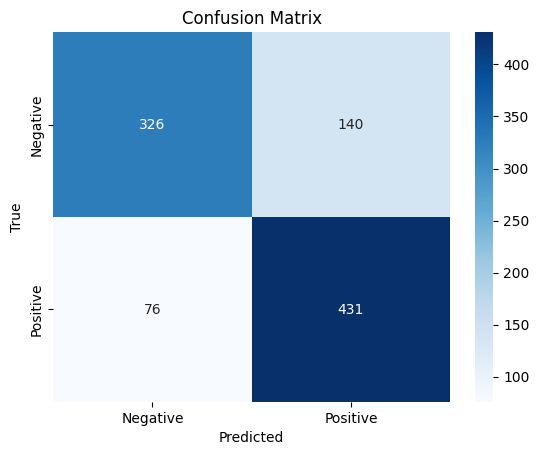

In [89]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cnf_matrix)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### SVM Model

In [90]:
svm_model = svm.SVC(C=100.0, gamma =1,kernel='rbf')
svm_model.fit(X_train, y_train) 

SVC(C=100.0, gamma=1)

In [91]:
y_pred = svm_model.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,

In [92]:
svm_f1score = f1_score(y_test, y_pred, average='weighted')
svm_accuracy = accuracy_score(y_test, y_pred)

print('F1 Score: %.4f' % svm_f1score)
print('Accuracy: %f' % svm_accuracy)
print(classification_report(y_pred, y_test))

F1 Score: 0.9113
Accuracy: 0.911614
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       424
           1       0.96      0.88      0.92       549

    accuracy                           0.91       973
   macro avg       0.91      0.92      0.91       973
weighted avg       0.92      0.91      0.91       973



Confusion Matrix:
[[402  64]
 [ 22 485]]


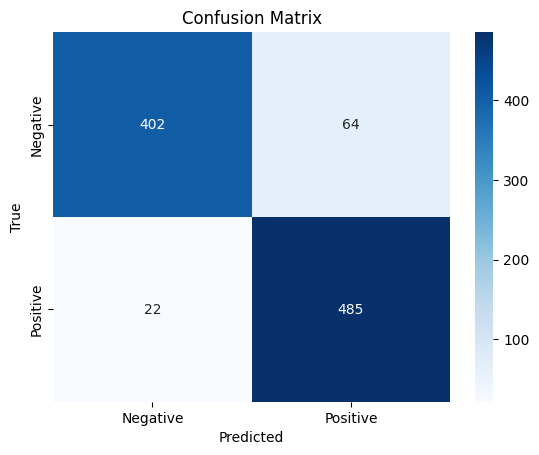

In [93]:
cnf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix
print("Confusion Matrix:")
print(cnf_matrix)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Random Forest Model

Since the random forest model was performing quite well, we did a different sort of split for this model: train, test, and validation, to determine if overfitting was occurring. 

In [94]:
X_train_val_rf, X_test_rf, y_train_val_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_rf, X_val_rf, y_train_rf, y_val_rf = train_test_split(X_train_val_rf, y_train_val_rf, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


forest = RandomForestClassifier(criterion='entropy',max_depth= None, min_samples_leaf= 1, min_samples_split= 5,n_estimators=500)
forest.fit(X_train_rf, y_train_rf)
joblib.dump(forest, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [95]:
y_val_pred_rf = forest.predict(X_val_rf)

# Calculate metrics on the validation set
val_accuracy = accuracy_score(y_val_rf, y_val_pred_rf)
val_f1score = f1_score(y_val_rf, y_val_pred_rf, average='weighted')

print('Validation F1_score: %.4f' % val_f1score)
print('Validation Accuracy: %f' % val_accuracy)
print('Validation Classification Report:')
print(classification_report(y_val_pred_rf, y_val_rf))

# Predict on the test set
y_test_pred_rf = forest.predict(X_test_rf)

# Calculate metrics on the test set
rand_accuracy = accuracy_score(y_test_rf, y_test_pred_rf)
rand_f1score = f1_score(y_test_rf, y_test_pred_rf, average='weighted')

print('Test F1_score: %.4f' % rand_f1score)
print('Test Accuracy: %f' % rand_accuracy)
print('Test Classification Report:')

print(classification_report(y_test_pred_rf, y_test_rf))


Validation F1_score: 0.9871
Validation Accuracy: 0.987147
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       952
           1       1.00      0.97      0.99       993

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945

Test F1_score: 0.9835
Test Accuracy: 0.983548
Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       920
           1       1.00      0.97      0.98      1025

    accuracy                           0.98      1945
   macro avg       0.98      0.98      0.98      1945
weighted avg       0.98      0.98      0.98      1945



Confusion Matrix:
[[920  32]
 [  0 993]]


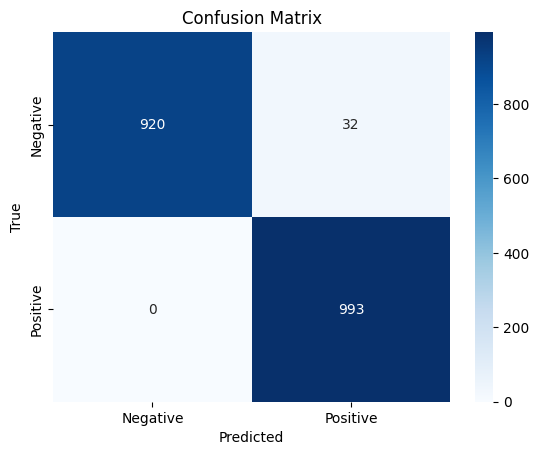

In [96]:
cnf_matrix = confusion_matrix(y_test_rf, y_test_pred_rf)
print("Confusion Matrix:")
print(cnf_matrix)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Neural Network

=> Number of Features: 10
Training with shape=(10, 20, 30), learning_rate=0.001, epochs=700
Epoch 1/700
18/18 [==============================] - 1s 1000us/step - loss: 1.6427 - accuracy: 0.5023
Epoch 2/700
18/18 [==============================] - 0s 1ms/step - loss: 1.0128 - accuracy: 0.5019
Epoch 3/700
18/18 [==============================] - 0s 1ms/step - loss: 0.8344 - accuracy: 0.5077
Epoch 4/700
18/18 [==============================] - 0s 1ms/step - loss: 0.7374 - accuracy: 0.4825
Epoch 5/700
18/18 [==============================] - 0s 1ms/step - loss: 0.7011 - accuracy: 0.5126
Epoch 6/700
18/18 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.5540
Epoch 7/700
18/18 [==============================] - 0s 1ms/step - loss: 0.6605 - accuracy: 0.6217
Epoch 8/700
18/18 [==============================] - 0s 1ms/step - loss: 0.6473 - accuracy: 0.6544
Epoch 9/700
18/18 [==============================] - 0s 1ms/step - loss: 0.6372 - accuracy: 0.6700
Epoch 10/700
1

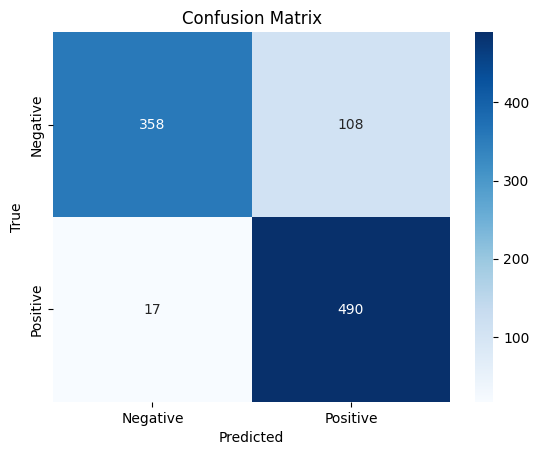

Accuracy: 87.15%
Precision: 81.94%
Recall: 96.65%
F1 Score: 88.69%


In [97]:

import tensorflow as tf
import logging
import pickle
import os
from sklearn.utils.class_weight import compute_class_weight

# Only log errors
tf.get_logger().setLevel(logging.ERROR)

feature_ct = len(X_train.keys())
print(f"=> Number of Features: {feature_ct}")

# Hyperparameters
## Layers
ACTIVATION_FUNC = 'relu'
# Different hyperparameters for grid search
# shapes = [(10,20,30),(40,50,60),(40,30,10)]
# learning_rates = [0.001, 0.02, 0.05]
# epochs = [100,200,500,700,1500]
shapes = [(10, 20, 30)]
learning_rates = [0.001]
epochs = [700]

best_loss = float('inf')
best_model = None
best_params = {}

for shape in shapes:
    for lr in learning_rates:
        for epoch in epochs:
            print(f"Training with shape={shape}, learning_rate={lr}, epochs={epoch}")

            model = tf.keras.Sequential(
                [
                    tf.keras.layers.Dense(feature_ct, activation=ACTIVATION_FUNC, input_shape=[feature_ct]),
                    tf.keras.layers.Dense(shape[0], activation=ACTIVATION_FUNC),
                    tf.keras.layers.Dense(shape[1], activation=ACTIVATION_FUNC),
                    tf.keras.layers.Dense(shape[2], activation=ACTIVATION_FUNC),
                    tf.keras.layers.Dense(1),
                ]
            )

            optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

            model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

            model.fit(X_train, y_train, epochs=epoch, batch_size=512, verbose=1)

            loss, accuracy = model.evaluate(X_test, y_test)

            print(f"Loss: {loss}")

            if loss < best_loss:
                best_loss = loss
                best_model = model
                best_params = {'shape': shape, 'learning_rate': lr, 'epochs': epoch}

# Save the best model
# best_model_dir = 'best_model'
# os.makedirs(best_model_dir, exist_ok=True)
# best_model.save(os.path.join(best_model_dir, 'model.h5'))

print("Best Hyperparameters:")
print(f"Shape: {best_params['shape']}, Learning Rate: {best_params['learning_rate']}, Epochs: {best_params['epochs']}")
print(f"Best Loss: {best_loss}")

print(y_test)

predictions = best_model.predict(X_test).flatten()  # Use X_test for prediction
binary_predictions = (predictions > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, binary_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
nn_accuracy = accuracy_score(y_test, binary_predictions)
print(f"Accuracy: {nn_accuracy * 100:.2f}%")

# Calculate precision
precision = precision_score(y_test, binary_predictions)
print(f"Precision: {precision * 100:.2f}%")

# Calculate recall
recall = recall_score(y_test, binary_predictions)
print(f"Recall: {recall * 100:.2f}%")

# Calculate F1 score
nn_f1 = f1_score(y_test, binary_predictions)
print(f"F1 Score: {nn_f1 * 100:.2f}%")

# Comparing Model Performance

In [98]:
Accuracy = [lr_accuracy*100,svm_accuracy*100, round(rand_accuracy*100), nn_accuracy*100]
Algorithm = ['logistic regression', 'svm', 'random forest', 'neural network']
f1_score=[lr_f1score*100,svm_f1score*100, rand_f1score*100, nn_f1*100]
data={'Algorithm':Algorithm,'Accuracy':Accuracy,'F1_SCORE':f1_score}
Report=pd.DataFrame(data=data)
Report

,Algorithm,Accuracy,F1_SCORE
0,logistic regression,77.800617,77.641186
1,svm,91.161357,91.128573
2,random forest,98.000000,98.353738
3,neural network,87.153135,88.687783
